In [7]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [8]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544


In [9]:
df_sample = df.sample(10000, replace=False)
df_sample.shape

(10000, 4)

In [10]:
X = df_sample.drop('customer_unique_id', axis=1).values
y = df_sample['customer_unique_id'].values
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [11]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(10000, 3)


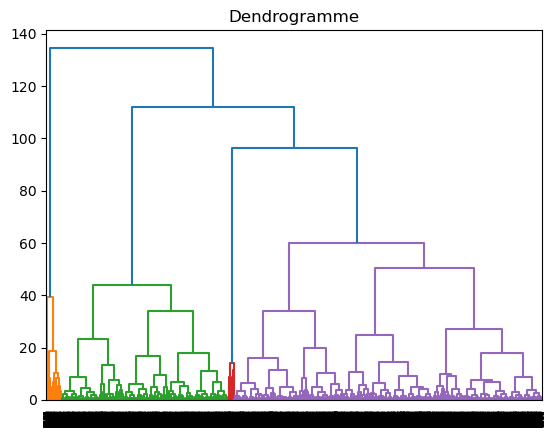

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Calcul de la matrice de distance
distance_matrix = linkage(X_norm, method='ward')  # Vous pouvez choisir une autre méthode si nécessaire

# Création du dendrogramme
dendrogram_plot = dendrogram(distance_matrix)

# Affichage du dendrogramme
plt.title('Dendrogramme')
plt.show()



In [ ]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544


In [ ]:
X = df.drop('customer_unique_id', axis=1).values
y = df['customer_unique_id'].values
print(X.shape)
print(y.shape)

(96096, 3)
(96096,)


In [19]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(96096, 3)


In [13]:
n_clusters = 5
CAH = AgglomerativeClustering(n_clusters=n_clusters)
clusters = CAH.fit_predict(X_norm)

In [14]:
df_sample['Cluster'] = CAH.labels_
df_sample

,customer_unique_id,Recency,Frequency,Monetary,Cluster
35571,fc7963d687c42e7d82ccbbf530234f6c,27.762546,1,1.691106,4
69990,80be8115b1239a9756aa538b49235bb6,17.450627,1,1.637172,2
43175,455f4c1b4b0079249b09053a1c9b966f,21.887723,1,1.522649,0
57431,0dc3a4327bacc5b339d49aa33120365b,29.846139,1,1.513184,0
82310,66ca2ca7492e19de95ed449f66a8e664,33.217726,1,1.641421,4
...,...,...,...,...,...
10563,1509d43a8008e2cbd252f354ab8e22ca,25.496081,1,1.591934,4
46382,49fa4cfc9a4eeac981257524ffa29816,22.137370,1,1.500972,0
1161,52c247722e2351bcf25b1d759a8a58ae,23.643940,1,1.254350,0
34647,1e4b7a60084f3f7470f48ce3332f3d94,31.970198,1,1.223637,0


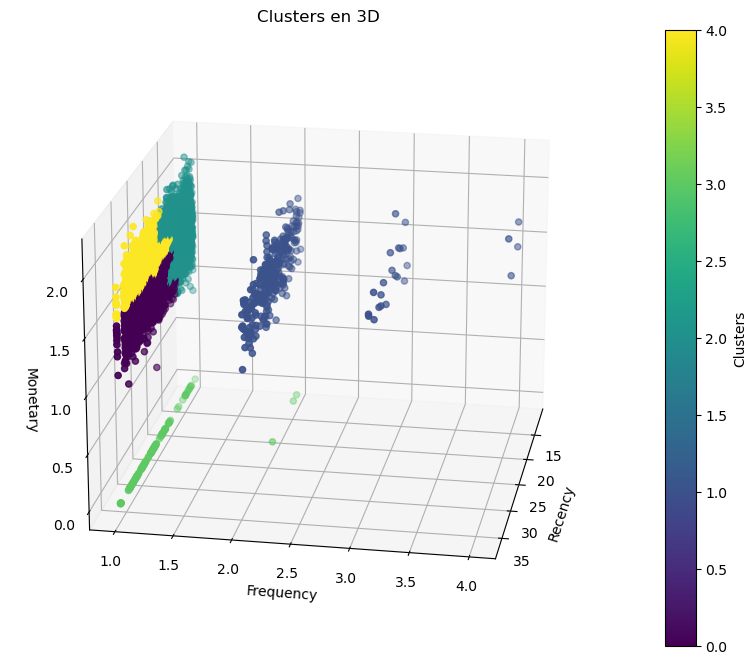

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

scatter = ax.scatter(df_sample['Recency'], df_sample['Frequency'], df_sample['Monetary'], c=df_sample['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()